<a href="https://colab.research.google.com/github/Akshat13shah/STT_Ai_Assignment6/blob/main/Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
pip install --upgrade tensorflow

In [3]:
!pip install --upgrade keras tensorflow

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [5]:
# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target.reshape(-1, 1)

In [6]:
# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

In [7]:
# Split the dataset into training, and test sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [8]:
# Function to build the model
def build_model(input_shape=(4,)):
    model = Sequential([
        InputLayer(shape=input_shape),
        Dense(16, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

In [9]:
# Function to compile the model
def compile_model(model, learning_rate):
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=keras.losses.BinaryCrossentropy())

In [10]:
# Function to train the model
def train_model(model, X_train, y_train, epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        verbose=1, validation_split=0.1)
    return history

In [11]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

    return accuracy, f1, y_pred_classes, y_test_classes

In [12]:
# Function to display sample predictions in a simple, clean format
def display_sample_predictions(X_test, y_test_classes, y_pred_classes):
    print("\nSample Predictions:")
    print("-" * 50)
    print(f"{'Features':<30} {'True Label':<15} {'Predicted Label'}")
    print("-" * 50)

    # Loop through the first 5 predictions or as many as available
    for i in range(min(5, len(X_test))):
        # Format the output neatly
        feature_str = str(X_test[i])
        true_label = y_test_classes[i]
        predicted_label = y_pred_classes[i]

        # Print the row in a formatted way
        print(f"{feature_str:<30} {true_label:<15} {predicted_label}")

    print("-" * 50)


In [13]:
# Function to perform grid search
def grid_search(batch_sizes, learning_rates, epochs, X_train, y_train, X_test, y_test):
    config_list_grid = []
    results = []
    train_losses = []  # List to store training loss for each configuration
    val_losses = []    # List to store validation loss for each configuration

    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            for epoch in epochs:
                print(f"\nTraining model with batch_size={batch_size}, learning_rate={learning_rate}, epochs={epoch}")
                keras.backend.clear_session()  # Reset the Keras backend session

                # Build and compile the model
                model = build_model(input_shape=(4,))
                compile_model(model, learning_rate)

                # Train the model
                history = train_model(model, X_train, y_train, epoch, batch_size)

                # Evaluate the model
                accuracy, f1, y_pred_classes, y_test_classes = evaluate_model(model, X_test, y_test)

                # Record the configuration and results
                config_list_grid.append((batch_size, learning_rate, epoch))
                results.append({
                    'batch_size': batch_size,
                    'learning_rate': learning_rate,
                    'epochs': epoch,
                    'accuracy': accuracy,
                    'f1': f1,
                    'train_loss': history.history['loss'],
                    'val_loss': history.history['val_loss'],
                    'y_pred_classes': y_pred_classes,
                    'y_test_classes': y_test_classes
                })

                # Store the train_loss and val_loss for plotting
                train_losses.append(history.history['loss'])
                val_losses.append(history.history['val_loss'])

                # Display sample predictions
                display_sample_predictions(X_test, y_test_classes, y_pred_classes)

                # Output evaluation metrics
                print(f"\nEvaluation for batch_size={batch_size}, learning_rate={learning_rate}, epochs={epoch}")
                print(f"Accuracy: {accuracy:.4f}")
                print(f"F1 Score: {f1:.4f}")

    # Return the results and loss values for plotting
    return results, train_losses, val_losses

In [14]:
# Define hyperparameter values
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

In [15]:
# Perform grid search
results, train_losses, val_losses = grid_search(batch_sizes, learning_rates, epochs, X_train, y_train, X_test, y_test)


Training model with batch_size=2, learning_rate=0.001, epochs=1
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2020 - val_loss: 0.7322
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

Sample Predictions:
--------------------------------------------------
Features                       True Label      Predicted Label
--------------------------------------------------
[6.1 2.8 4.7 1.2]              1               1
[5.7 3.8 1.7 0.3]              0               1
[7.7 2.6 6.9 2.3]              2               1
[6.  2.9 4.5 1.5]              1               1
[6.8 2.8 4.8 1.4]              1               1
--------------------------------------------------

Evaluation for batch_size=2, learning_rate=0.001, epochs=1
Accuracy: 0.3000
F1 Score: 0.1385

Training model with batch_size=2, learning_rate=0.001, epochs=3
Epoch 1/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7233 - val_loss: 0.5732
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6038 - val_loss: 0.5198
Epoch 3/3
54/54 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step

Sample Predictions:
--------------------------------------------------
Features                       True Label      Predicted Label
--------------------------------------------------
[6.1 2.8 4.7 1.2]              1               1
[5.7 3.8 1.7 0.3]              0               0
[7.7 2.6 6.9 2.3]              2               1
[6.  2.9 4.5 1.5]              1               1
[6.8 2.8 4.8 1.4]              1               1
--------------------------------------------------

Evaluation for batch_size=2, learning_rate=1e-05, epochs=3
Accuracy: 0.6333
F1 Score: 0.5195

Training model with batch_size=2, learning_rate=1e-05, epochs=5
Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.7154 - val_loss: 1.8679
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6881 - val_loss: 1.8514
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6635 - val_loss: 1.8347
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6884 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step

Sample Predictions:
--------------------------------------------------
Features                       True Label      Predicted Label
--------------------------------------------------
[6.1 2.8 4.7 1.2]              1               0
[5.7 3.8 1.7 0.3]              0               2
[7.7 2.6 6.9 2.3]              2               0
[6.  2.9 4.5 1.5]              1               0
[6.8 2.8 4.8 1.4]              1               0
--------------------------------------------------

Evaluation for batch_size=2, learning_rate=1e-05, epochs=5
Accuracy: 0.0667
F1 Score: 0.0417

Training model with batch_size=4, learning_rate=0.001, epochs=1
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0370 - val_loss: 0.8099
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

Sample Predictions:
--------------------------------------------------
Features                       True Label      Predicted Label
--------------------------------------------------
[6.1 2.8 4.7 1.2]      

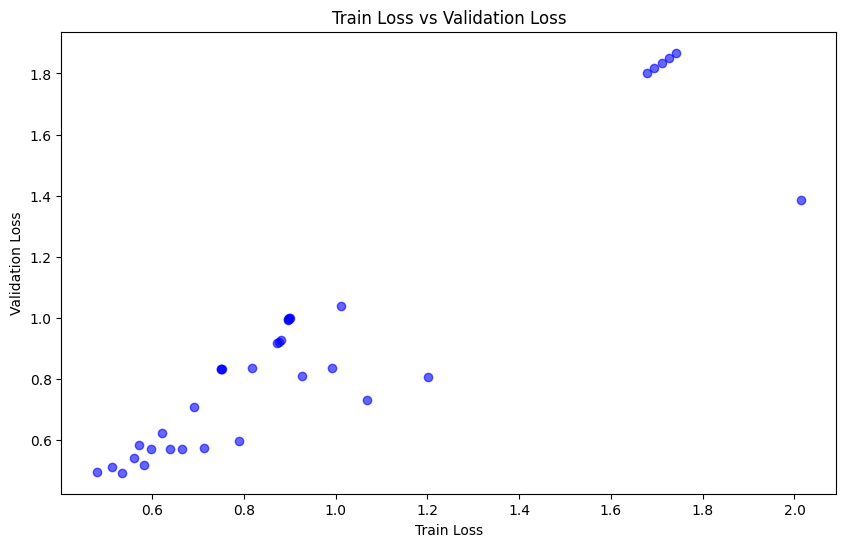

In [16]:
# Function to plot train loss vs val loss
def plot_train_vs_val_loss(train_losses, val_losses):
    # Flatten the lists of losses to ensure that each epoch is represented as a single point
    flat_train_losses = [loss for epoch_losses in train_losses for loss in epoch_losses]
    flat_val_losses = [loss for epoch_losses in val_losses for loss in epoch_losses]

    # Convert them to NumPy arrays if not already (for better handling)
    flat_train_losses = np.array(flat_train_losses)
    flat_val_losses = np.array(flat_val_losses)

    # Plotting Train Loss vs Validation Loss
    plt.figure(figsize=(10, 6))
    plt.scatter(flat_train_losses, flat_val_losses, color='blue', alpha=0.6)
    plt.xlabel('Train Loss')
    plt.ylabel('Validation Loss')
    plt.title('Train Loss vs Validation Loss')
    plt.show()

# Example usage after running grid_search and getting train_losses and val_losses:
plot_train_vs_val_loss(train_losses, val_losses)


In [17]:
pd.DataFrame(results)

,batch_size,learning_rate,epochs,accuracy,f1,train_loss,val_loss,y_pred_classes,y_test_classes
0,2,0.00100,1,0.300000,0.138462,[1.0690516233444214],[0.7321962714195251],"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
1,2,0.00100,3,0.866667,0.857875,"[0.7139763832092285, 0.5835579037666321, 0.534...","[0.5731868743896484, 0.5197771787643433, 0.493...","[2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
2,2,0.00100,5,0.366667,0.268138,"[2.014592409133911, 1.2023062705993652, 0.7885...","[1.387237548828125, 0.8071585297584534, 0.5986...","[2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
3,2,0.00001,1,0.366667,0.196748,[0.9911723732948303],[0.8346356749534607],"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
4,2,0.00001,3,0.633333,0.519540,"[0.8808038234710693, 0.8764530420303345, 0.872...","[0.9266251921653748, 0.9220500588417053, 0.917...","[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
5,2,0.00001,5,0.066667,0.041667,"[1.7422032356262207, 1.7263569831848145, 1.710...","[1.8678816556930542, 1.851380467414856, 1.8346...","[0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
6,4,0.00100,1,0.300000,0.142105,[0.9257676601409912],[0.8098755478858948],"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
7,4,0.00100,3,0.766667,0.720585,"[0.561405599117279, 0.5117083191871643, 0.4793...","[0.5414568781852722, 0.5130982398986816, 0.494...","[1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
8,4,0.00100,5,0.600000,0.492308,"[1.011507272720337, 0.8174950480461121, 0.6913...","[1.03742516040802, 0.8362395167350769, 0.70754...","[2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
9,4,0.00001,1,0.400000,0.334954,[0.5967893004417419],[0.569955587387085],"[1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."


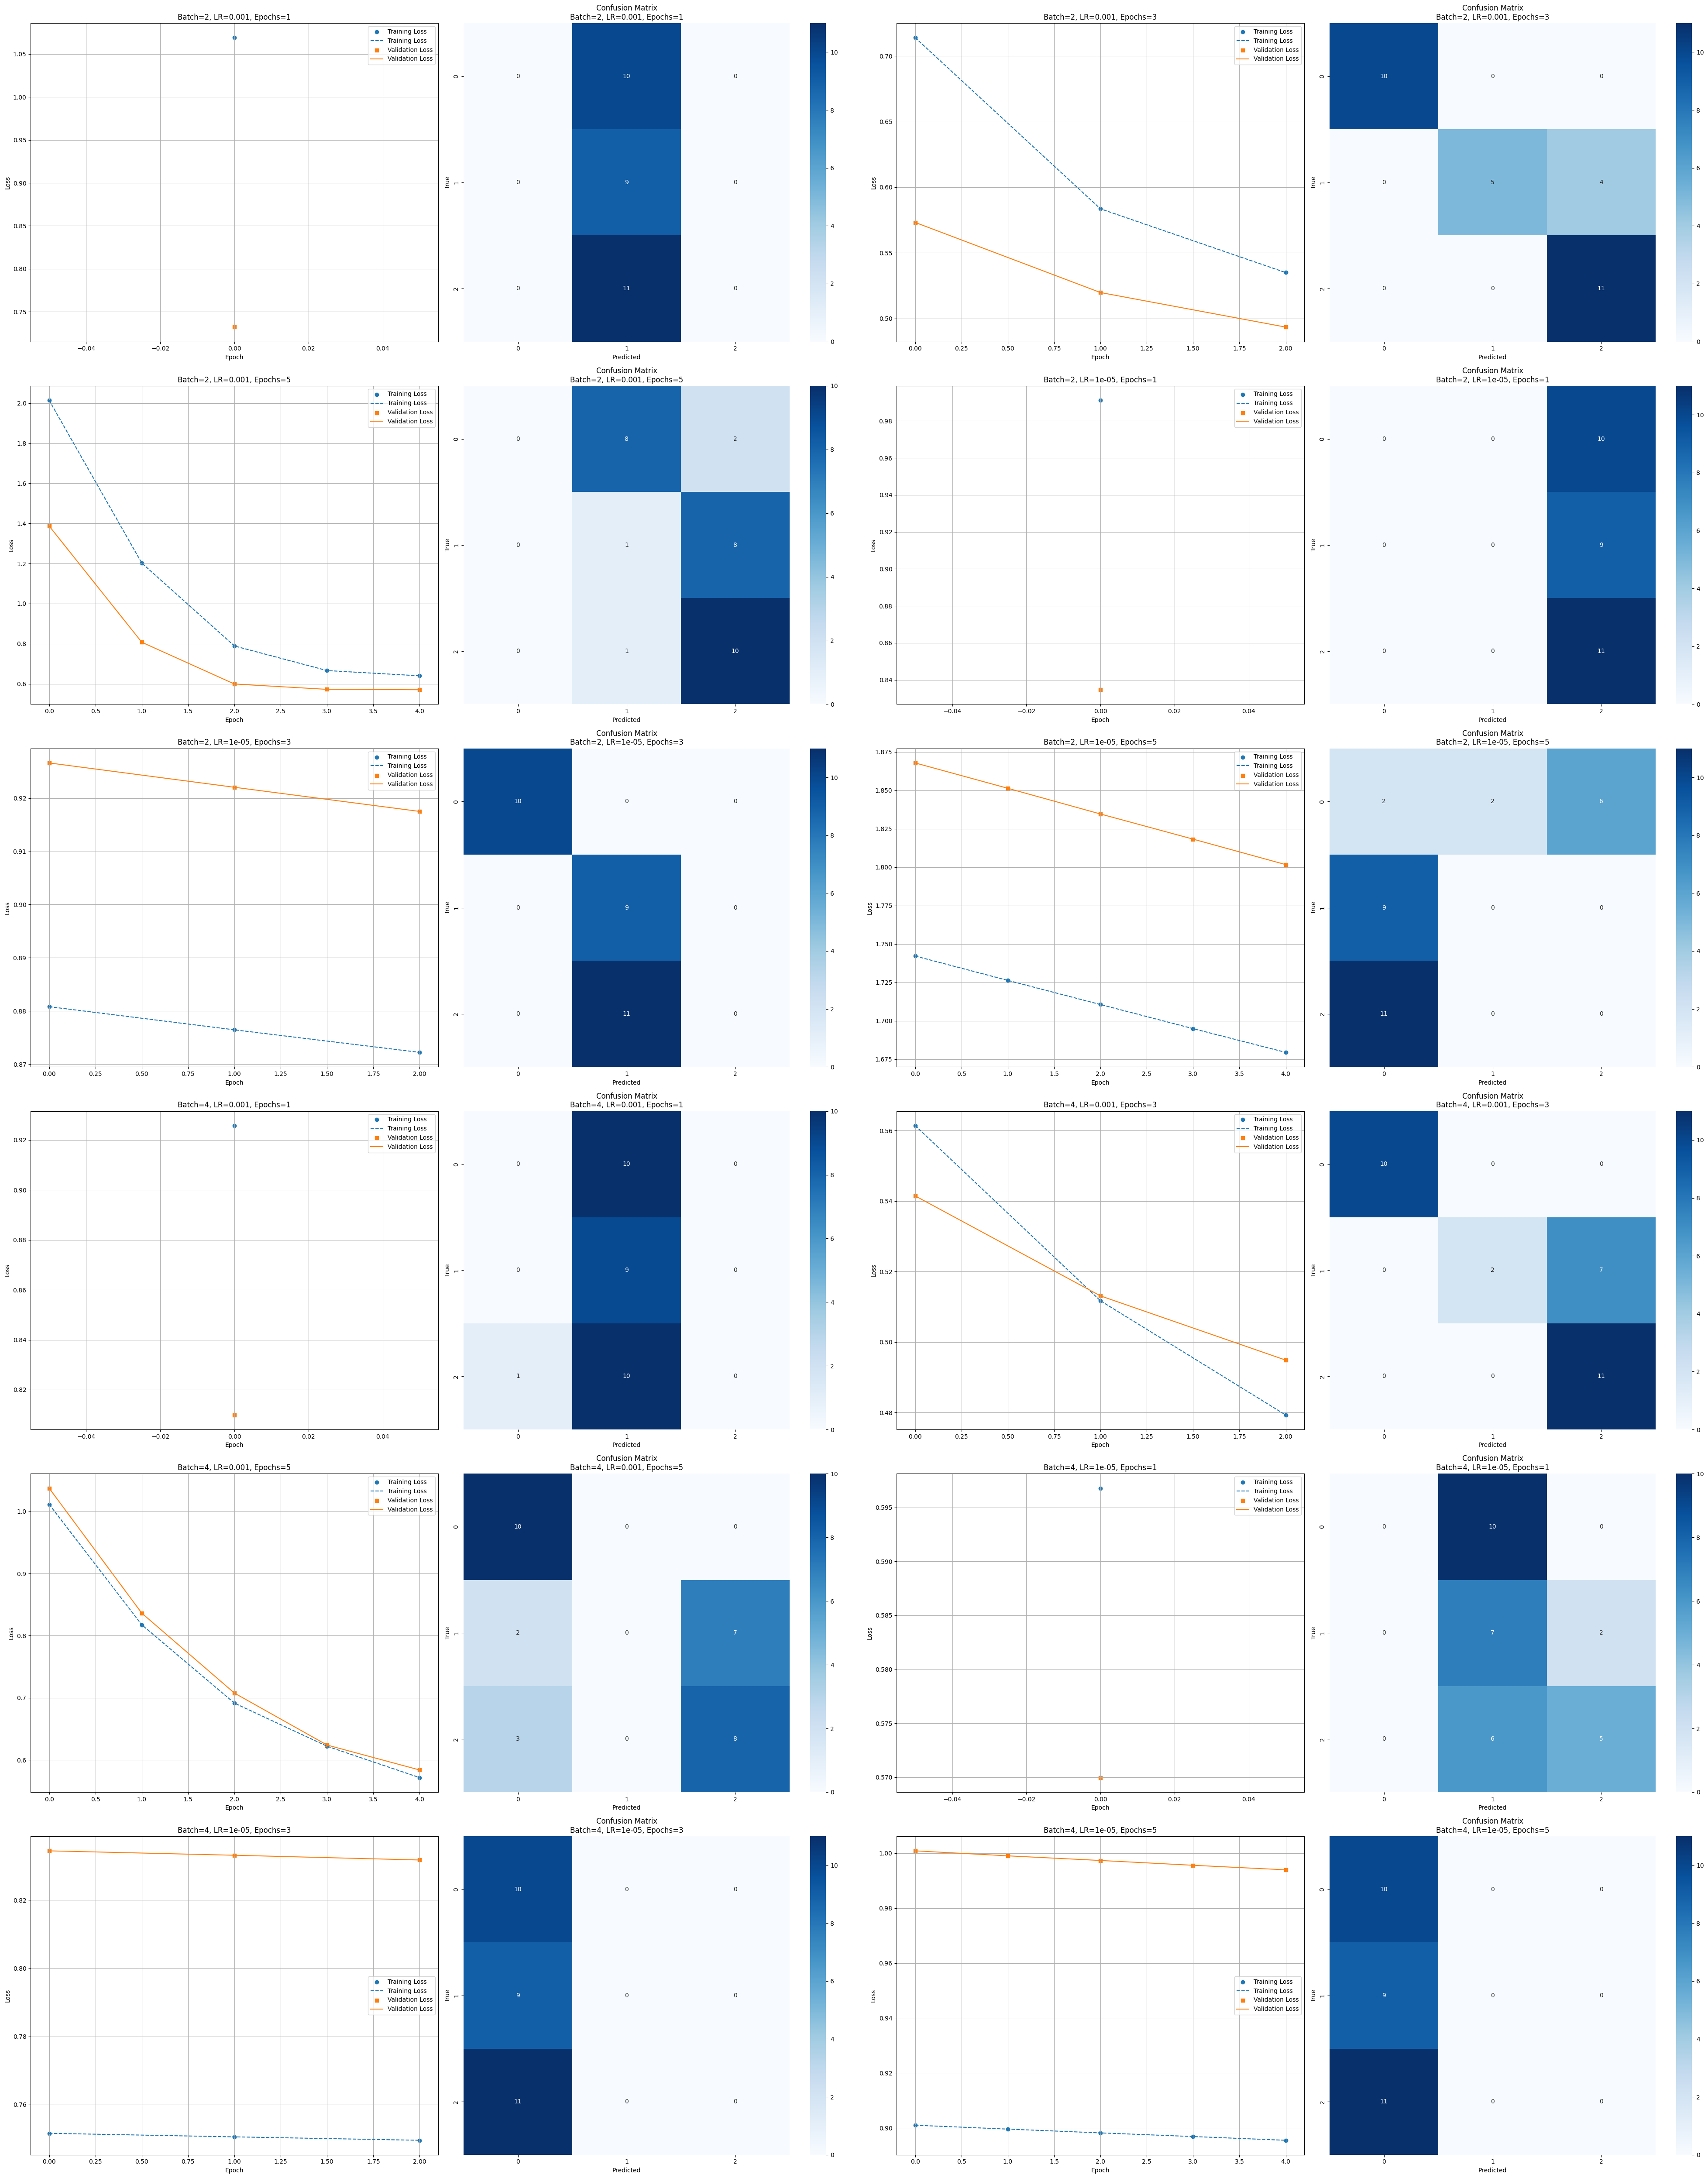

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Number of plots = 24
num_plots = 24

# Create a 6-row, 4-column grid for the plots (training/validation loss and confusion matrices)
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(40, 50))  # 6 rows, 4 columns
axes = axes.flatten()

# Loop to plot both training/validation loss and confusion matrix
for i in range(num_plots // 2):  # Dividing by 2 because we plot 2 items per result (loss plot and confusion matrix)
    result = results[i]

    # Left column for training/validation loss (first 12 axes)
    ax_loss = axes[2 * i]  # Select corresponding axis for loss plot

    # Plot Training and Validation Loss
    ax_loss.scatter(range(len(result['train_loss'])), result['train_loss'], label='Training Loss', marker='o')
    ax_loss.plot(result['train_loss'], label='Training Loss', linestyle='dashed')
    ax_loss.scatter(range(len(result['val_loss'])), result['val_loss'], label='Validation Loss', marker='s')
    ax_loss.plot(result['val_loss'], label='Validation Loss', linestyle='solid')
    ax_loss.set_xlabel('Epoch')
    ax_loss.set_ylabel('Loss')
    ax_loss.set_title(f'Batch={result["batch_size"]}, LR={result["learning_rate"]}, Epochs={result["epochs"]}')
    ax_loss.legend()
    ax_loss.grid(True)

    # Right column for confusion matrix (next 12 axes)
    ax_cm = axes[2 * i + 1]  # Select corresponding axis for confusion matrix

    # Plot Confusion Matrix
    cm = confusion_matrix(result['y_test_classes'], result['y_pred_classes'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax_cm)
    ax_cm.set_title(f'Confusion Matrix\nBatch={result["batch_size"]}, LR={result["learning_rate"]}, Epochs={result["epochs"]}')
    ax_cm.set_xlabel('Predicted')
    ax_cm.set_ylabel('True')

# Remove any unused subplots if the number of results is less than 24
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [19]:
!pip install autogluon

In [20]:
import autogluon.common as agcm
from autogluon.tabular import TabularPredictor, TabularDataset

In [21]:
# importing the iris dataset with pd as required by AutoGluon
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Split with stratification (70% train, 20% test, 10% holdout for bagging)

train, test = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=42)

# Convert to AutoGluon datasets
train_data = TabularDataset(train)
test_data = TabularDataset(test)

In [22]:
# Define and initialize all configurations in one go
predictor = TabularPredictor(
    label='target',
    eval_metric='accuracy',
    path='models/random_models',
    verbosity=2,
    problem_type='multiclass'
).fit(
    train_data,
    hyperparameters={'NN_TORCH': {
        'num_epochs': agcm.space.Categorical(1, 3, 5),
        'learning_rate': agcm.space.Categorical(1e-3, 1e-5),
        'batch_size': agcm.space.Categorical(2, 4),
        'activation': 'relu',
        'hidden_size': 16,
        'num_layers': 1
    }},
    time_limit=600,
    verbosity=2,
    presets='medium_quality_faster_train',
    raise_on_no_models_fitted=True,
    hyperparameter_tune_kwargs={
        'num_trials': 10,
        'scheduler': 'local',
        'searcher': 'random'
    }
)


Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.08 GB / 12.67 GB (87.4%)
Disk Space Avail:   71.20 GB / 107.72 GB (66.1%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/random_models"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11348.94 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Infer

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 10                    |
+--------------------------------------------------------+

View detailed results here: /content/models/random_models/models/NeuralNetTorch


Fitted model: NeuralNetTorch/4f2c3_00000 ...
	0.5417	 = Validation score   (accuracy)
	18.42s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/4f2c3_00001 ...
	0.0	 = Validation score   (accuracy)
	18.32s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/4f2c3_00002 ...
	0.6667	 = Validation score   (accuracy)
	8.68s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/4f2c3_00003 ...
	0.6667	 = Validation score   (accuracy)
	8.75s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/4f2c3_00004 ...
	0.6667	 = Validation score   (accuracy)
	12.44s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/4f2c3_00005 ...
	0.6667	 = Validation score   (accuracy)
	12.26s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/4f2c3_00006 ...
	0.6667	 = Validation score   (accuracy)
	6.23s	 = Training   runtime
	0.01s	 = Validation r

Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 466.50s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/4f2c3_00002': 1.0}
	0.6667	 = Validation score   (accuracy)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 133.56s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 2690.7 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/random_models")


In [23]:
import os
import pickle
import pandas as pd

# Initialize an empty dictionary to store the models and their hyperparameters
random_models = {}

# Path to the random models directory
models_base_path = '/content/models/random_models/models/NeuralNetTorch'

# Iterate through each folder in the base path
for folder in os.listdir(models_base_path):
    folder_path = os.path.join(models_base_path, folder)

    # Continue only if it's a directory
    if os.path.isdir(folder_path):
        # Iterate through each file in the folder
        for file in os.listdir(folder_path):
            model_file_path = os.path.join(folder_path, file)

            # Open the pickle file and load the model
            with open(model_file_path, 'rb') as file:
                model_pkl = pickle.load(file)

            # Store the hyperparameters in the dictionary
            random_models[folder] = (
                model_pkl.params.get('batch_size', None),  # Safe access with .get()
                model_pkl.params.get('learning_rate', None),
                model_pkl.params.get('num_epochs', None)
            )

# Convert the random_models dictionary to a pandas DataFrame
df_random_models = pd.DataFrame.from_dict(random_models, orient='index', columns=['batch_size', 'learning_rate', 'num_epochs'])

# Display the DataFrame as a table
print("\nRandom Models Hyperparameters Table:")
df_random_models



Random Models Hyperparameters Table:


,batch_size,learning_rate,num_epochs
4f2c3_00009,2,0.00100,3
4f2c3_00006,2,0.00100,3
4f2c3_00008,2,0.00100,1
4f2c3_00003,2,0.00100,3
4f2c3_00005,4,0.00100,3
4f2c3_00002,2,0.00100,3
4f2c3_00004,4,0.00100,5
4f2c3_00000,2,0.00100,1
4f2c3_00007,2,0.00001,1
4f2c3_00001,4,0.00001,1


In [24]:
# Evaluate performance
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Get leaderboard and create clean configuration table
leaderboard_1 = predictor.leaderboard(test_data)

Test Accuracy: 0.6667
Test F1: 0.5368


In [25]:
random_models

{'4f2c3_00009': (2, 0.001, 3),
 '4f2c3_00006': (2, 0.001, 3),
 '4f2c3_00008': (2, 0.001, 1),
 '4f2c3_00003': (2, 0.001, 3),
 '4f2c3_00005': (4, 0.001, 3),
 '4f2c3_00002': (2, 0.001, 3),
 '4f2c3_00004': (4, 0.001, 5),
 '4f2c3_00000': (2, 0.001, 1),
 '4f2c3_00007': (2, 1e-05, 1),
 '4f2c3_00001': (4, 1e-05, 1)}

In [26]:
# Initialize an empty list to store the configuration data
config_table_r = []

# Loop through each row in the leaderboard
for _, model_row in leaderboard_1.iterrows():
    if 'NeuralNetTorch' not in model_row['model']:
        continue

    # Predict using the model and calculate the F1 score
    model_preds = predictor.predict(test_data.drop(columns=['target']), model=model_row['model'])
    f1 = f1_score(y_test, model_preds, average='weighted')

    # Extract hyperparameters from the model name using 'random_models' dictionary
    model_key = model_row['model'].split('/')[1]
    hyperparams = random_models.get(model_key, [None, None, None])

    # Collect the data in a dictionary and append to the config_table
    config_table_r.append({
        'Model': model_row['model'],
        'Accuracy': model_row['score_test'],
        'F1': f1,
        'learning_rate': hyperparams[1],
        'epochs': hyperparams[2],
        'batch_size': hyperparams[0]
    })

# Convert the list into a DataFrame for easy visualization
config_df_r = pd.DataFrame(config_table_r)

# Output the resulting configuration table
print("\nConfiguration Performance Table:")
config_df_r



Configuration Performance Table:


,Model,Accuracy,F1,learning_rate,epochs,batch_size
0,NeuralNetTorch/4f2c3_00004,0.700000,0.606871,0.00100,5,4
1,NeuralNetTorch/4f2c3_00003,0.666667,0.536769,0.00100,3,2
2,NeuralNetTorch/4f2c3_00002,0.666667,0.536769,0.00100,3,2
3,NeuralNetTorch/4f2c3_00005,0.633333,0.508547,0.00100,3,4
4,NeuralNetTorch/4f2c3_00000,0.600000,0.490000,0.00100,1,2
5,NeuralNetTorch/4f2c3_00008,0.600000,0.490000,0.00100,1,2
6,NeuralNetTorch/4f2c3_00009,0.566667,0.556692,0.00100,3,2
7,NeuralNetTorch/4f2c3_00006,0.566667,0.475870,0.00100,3,2
8,NeuralNetTorch/4f2c3_00007,0.433333,0.364734,0.00001,1,2
9,NeuralNetTorch/4f2c3_00001,0.066667,0.074074,0.00001,1,4


In [27]:
# Fit the model
predictor = TabularPredictor(
    label='target',
    eval_metric='accuracy',
    path='models/bayesian_model',
    verbosity=2,
).fit(
    train_data,
    hyperparameters={'NN_TORCH': {
    'num_epochs': agcm.space.Categorical(1, 3, 5),
    'learning_rate': agcm.space.Categorical(1e-3, 1e-5),
    'batch_size': agcm.space.Categorical(2, 4),
    'activation': 'relu',
    'optimizer': 'adam',
    'hidden_size': 16,
    'num_layers': 1
}},
    time_limit=300,
    verbosity=2,
    presets='medium_quality_faster_train',
    raise_on_no_models_fitted=True,
    hyperparameter_tune_kwargs={
    'num_trials': 10,
    'scheduler': 'local',
    'searcher': 'random',
}
)

Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.82 GB / 12.67 GB (77.5%)
Disk Space Avail:   71.17 GB / 107.72 GB (66.1%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "/content/models/bayesian_model"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [0, 2, 1]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may 

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 10                    |
+--------------------------------------------------------+

View detailed results here: /content/models/bayesian_model/models/NeuralNetTorch


Fitted model: NeuralNetTorch/97868_00000 ...
	0.5417	 = Validation score   (accuracy)
	6.81s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/97868_00001 ...
	0.2917	 = Validation score   (accuracy)
	6.78s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/97868_00002 ...
	0.0417	 = Validation score   (accuracy)
	8.56s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/97868_00003 ...
	0.6667	 = Validation score   (accuracy)
	8.55s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/97868_00004 ...
	0.5	 = Validation score   (accuracy)
	8.26s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/97868_00005 ...
	0.5	 = Validation score   (accuracy)
	8.35s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/97868_00006 ...
	0.2917	 = Validation score   (accuracy)
	8.06s	 = Training   runtime
	0.01s	 = Validation runtime

Fitting model: WeightedEnsemble_L2 ... Training model for up to 299.85s of the 212.90s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/97868_00008': 1.0}
	0.8333	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 87.17s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1718.0 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/bayesian_model")


In [28]:
import os
import pickle
import pandas as pd

# Initialize the dictionary to store Bayesian model hyperparameters
bayesian_models = {}

# Define the path to the Bayesian models directory
models_base_path = '/content/models/bayesian_model/models/NeuralNetTorch'

# Loop through each folder in the directory
for folder in os.listdir(models_base_path):
    folder_path = os.path.join(models_base_path, folder)

    # Ensure the folder is indeed a directory
    if os.path.isdir(folder_path):

        # Loop through each model file in the folder
        for file in os.listdir(folder_path):
            model_file_path = os.path.join(folder_path, file)

            # Open and load the model using pickle
            with open(model_file_path, 'rb') as f:
                model_pkl = pickle.load(f)

            # Extract the necessary hyperparameters and store them in the dictionary
            bayesian_models[folder] = (
                model_pkl.params.get('batch_size', None),  # Get batch size, default to None if not available
                model_pkl.params.get('learning_rate', None),  # Get learning rate, default to None if not available
                model_pkl.params.get('num_epochs', None)  # Get number of epochs, default to None if not available
            )

# Convert the bayesian_models dictionary into a pandas DataFrame
df_bayesian_models = pd.DataFrame.from_dict(bayesian_models, orient='index', columns=['batch_size', 'learning_rate', 'num_epochs'])

# Display the table
print("\nBayesian Models Hyperparameters Table:")
df_bayesian_models



Bayesian Models Hyperparameters Table:


,batch_size,learning_rate,num_epochs
97868_00002,2,0.00001,3
97868_00004,2,0.00100,1
97868_00007,2,0.00100,3
97868_00008,2,0.00100,3
97868_00006,2,0.00100,1
97868_00001,2,0.00100,1
97868_00009,2,0.00001,3
97868_00005,4,0.00100,1
97868_00003,2,0.00100,3
97868_00000,2,0.00100,1


In [29]:
# Evaluate performance
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Get leaderboard and create clean configuration table
leaderboard = predictor.leaderboard(test_data)

Test Accuracy: 0.8333
Test F1: 0.8222


In [30]:
# Initialize an empty list to store model configuration and performance metrics
config_table_b = []

# Loop through each model in the leaderboard
for _, model_row in leaderboard.iterrows():
    # Filter for models of type 'NeuralNetTorch'
    if 'NeuralNetTorch' in model_row['model']:
        # Prepare test data by removing the target column
        test_features = test_data.drop(columns=['target'])

        # Make predictions using the model
        model_preds = predictor.predict(test_features, model=model_row['model'])

        # Calculate the weighted F1 score
        f1 = f1_score(y_test, model_preds, average='weighted')

        # Extract the model name (after the last '/' in the model path)
        model_name = model_row['model'].split('/')[-1]

        # Retrieve hyperparameters from the bayesian_models dictionary
        model_params = bayesian_models.get(model_name, None)

        # If model parameters are found, extract the hyperparameters
        if model_params:
            learning_rate = model_params[1]  # 1st index for learning rate
            epochs = model_params[2]         # 2nd index for number of epochs
            batch_size = model_params[0]     # 0th index for batch size
        else:
            # If no parameters are found, set hyperparameters to None
            learning_rate = epochs = batch_size = None

        # Create an entry for the model configuration and performance
        model_info = {
            'Model': model_row['model'],
            'Accuracy': model_row['score_test'],
            'F1': f1,
            'learning_rate': learning_rate,
            'epochs': epochs,
            'batch_size': batch_size
        }

        # Append model info to the configuration table
        config_table_b.append(model_info)

# Convert the list of model information into a DataFrame
config_df_b = pd.DataFrame(config_table_b)

# Display the final configuration table
print("\nConfiguration Performance Table:")
config_df_b



Configuration Performance Table:


,Model,Accuracy,F1,learning_rate,epochs,batch_size
0,NeuralNetTorch/97868_00008,0.833333,0.822222,0.00100,3,2
1,NeuralNetTorch/97868_00007,0.666667,0.536769,0.00100,3,2
2,NeuralNetTorch/97868_00003,0.666667,0.536769,0.00100,3,2
3,NeuralNetTorch/97868_00000,0.600000,0.490000,0.00100,1,2
4,NeuralNetTorch/97868_00009,0.533333,0.471306,0.00001,3,2
5,NeuralNetTorch/97868_00005,0.466667,0.400966,0.00100,1,4
6,NeuralNetTorch/97868_00004,0.466667,0.416306,0.00100,1,2
7,NeuralNetTorch/97868_00006,0.433333,0.389992,0.00100,1,2
8,NeuralNetTorch/97868_00001,0.433333,0.389992,0.00100,1,2
9,NeuralNetTorch/97868_00002,0.066667,0.074074,0.00001,3,2


In [31]:
merged_df = pd.DataFrame(results).merge(config_df_r, on=["learning_rate", "epochs", "batch_size"], how="left", suffixes=("", "_random"))
merged_df = merged_df.merge(config_df_b, on=["learning_rate", "epochs", "batch_size"], how="left", suffixes=("", "_bayes"))
merged_df = merged_df.drop(columns=["train_loss", "val_loss", "y_pred_classes", "y_test_classes","Model"])


merged_df = merged_df.rename(columns={
    "Accuracy": "accuracy_random", "F1": "f1_random",
    "Accuracy_bayes": "accuracy_bayes", "F1_bayes": "f1_bayes"
})

# Display the merged configuration table
print("\nMerged Configuration Table:")
merged_df



Merged Configuration Table:


,batch_size,learning_rate,epochs,accuracy,f1,accuracy_random,f1_random,Model_bayes,accuracy_bayes,f1_bayes
0,2,0.00100,1,0.300000,0.138462,0.600000,0.490000,NeuralNetTorch/97868_00000,0.600000,0.490000
1,2,0.00100,1,0.300000,0.138462,0.600000,0.490000,NeuralNetTorch/97868_00004,0.466667,0.416306
2,2,0.00100,1,0.300000,0.138462,0.600000,0.490000,NeuralNetTorch/97868_00006,0.433333,0.389992
3,2,0.00100,1,0.300000,0.138462,0.600000,0.490000,NeuralNetTorch/97868_00001,0.433333,0.389992
4,2,0.00100,1,0.300000,0.138462,0.600000,0.490000,NeuralNetTorch/97868_00000,0.600000,0.490000
5,2,0.00100,1,0.300000,0.138462,0.600000,0.490000,NeuralNetTorch/97868_00004,0.466667,0.416306
6,2,0.00100,1,0.300000,0.138462,0.600000,0.490000,NeuralNetTorch/97868_00006,0.433333,0.389992
7,2,0.00100,1,0.300000,0.138462,0.600000,0.490000,NeuralNetTorch/97868_00001,0.433333,0.389992
8,2,0.00100,3,0.866667,0.857875,0.666667,0.536769,NeuralNetTorch/97868_00008,0.833333,0.822222
9,2,0.00100,3,0.866667,0.857875,0.666667,0.536769,NeuralNetTorch/97868_00007,0.666667,0.536769


# **Hyperparameters:-**


1.  Epochs: Increasing the number of epochs generally improves model performance, as it allows the model more time to learn patterns in the data. This is evident from the loss vs. epochs plot, where loss consistently decreases with more training epochs.
2.   Batch Size: A smaller batch size tends to enhance performance since it updates the model's weights more frequently. This results in more refined adjustments to the model parameters. The loss values across different hyperparameter combinations show that larger batch sizes often lead to higher loss.
3. Learning Rate: A higher learning rate typically leads to faster convergence, improving performance by reaching an optimal solution more quickly. This is reflected in the loss values, where higher learning rates often correspond to lower loss. However, excessively high learning rates can lead to instability.



#  **Manual Tuning vs. Automated Hyperparameter**
Automated hyperparameter search is particularly beneficial for large and complex models, where manually tuning parameters can be time-consuming and inefficient. It systematically explores a broad range of possibilities, often yielding better results while saving time and computational effort.

Manual tuning, on the other hand, can be useful when domain expertise and intuition about the problem are available. For small-scale models or when computational resources are limited, manually selecting hyperparameters may be a more practical approach.